#### Model

$$ \frac{d}{dt}N_0(t) = - \alpha _0 \cdot N_0(t) - \beta _0 \cdot N_0(t)

$$ \frac{d}{dt}N_1(t) = 2 \alpha _0 \cdot N_0(t) - \alpha _1 \cdot N_1(t) - \beta _1 \cdot N_1(t)

$$ \frac{d}{dt}N_j(t) = 2 \alpha _{j-1} \cdot N_{j-1}(t) - \alpha _j \cdot N_1(t) - \beta _j \cdot N_1(t) $$

$$ \frac{d}{dt}D(t) = \sum_{j=0}^{J} \beta _j N_j(t) - \delta D(t)

Model solution

$$N_j(t) = e^{-c(t-t_0)} \sum_{i=0}^j (2 \alpha)^i \frac{(t - to)^i}{i!} N_{j - i}(t_0), \quad j = 0, 1, ..., J $$

$$D(t) = \beta \sum_{j = 0}^J \sum_{i = 0}^j (2 \alpha)^iN_{j - i}(t_0) \Bigg\{ \frac{(-1)^i}{(\delta - c)^{i+1}} \Bigg(e^{(\delta - c)(t - t_0)}  \sum_{k = i}^0 \frac{((t - t_0)(c - \delta))^k}{k!} - 1\Bigg) \Bigg\} \cdot e^{- \delta (t - t_0)} + D(t_0)e^{- \delta (t - t_0)} $$

$$ c = \alpha + \beta$$

#### Init data
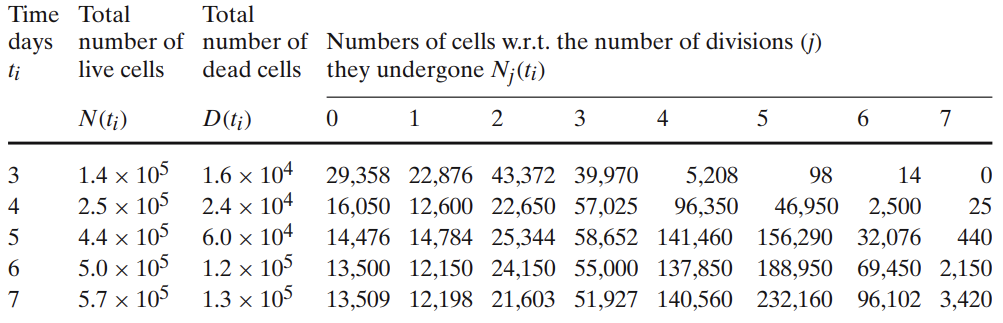

In [177]:
import numpy as np
from scipy.integrate import ode
from scipy.integrate import solve_ivp

In [178]:
D = np.array([1.6, 2.4, 6.0, 1.2, 1.3]) * 1e4

N = np.array([[29358, 22876, 43372, 39970, 5208, 98, 14, 0],
                [16050, 12600, 22650, 57025, 96350, 46950, 2500, 25],
                [14476, 14784, 25344, 58652, 141460, 156290, 32076, 440],
                [13500, 12150, 24150, 55000, 137850, 188950, 69450, 2150],
                [13509, 12198, 21603, 51927, 140560, 232160, 96102, 3420]])

t0 = 72
t1 = 72 + 24 * (len(D) - 1) + 1
t_eval = np.array([t for t in range(t0, t1, 1)]) # + 1 is to include last t cause range stop is excludive
p = [[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], 1]
y_init = np.concatenate((N[0], [D[0]]))
print(N)

[[ 29358  22876  43372  39970   5208     98     14      0]
 [ 16050  12600  22650  57025  96350  46950   2500     25]
 [ 14476  14784  25344  58652 141460 156290  32076    440]
 [ 13500  12150  24150  55000 137850 188950  69450   2150]
 [ 13509  12198  21603  51927 140560 232160  96102   3420]]


$$y = [N_0, N_1, ..., N_J]$$

In [179]:
def f(t, y, p):
    [alpha, beta, delta] = p
    N = y[0:-1]
    D = y[-1]
    result = []
    for j, _ in enumerate(N):
        if j == 0:
            dN_dt = -alpha[j] + beta[j] * N[j]
            result.append(dN_dt)
        else:
            dN_dt = 2 * alpha[j - 1] * N[j - 1] - (alpha[j] + beta[j]) * N[j]
            result.append(dN_dt)

    dD_dt = np.sum(beta * N) - delta * D
    result.append(dD_dt)

    return np.array(result)
        
        

In [180]:
sol = solve_ivp(fun=f, t_span=[t0, t1], y0=y_init, method='RK45', t_eval=t_eval, args=[p])

In [181]:
print(sol.t)
print(sol.y)


[ 72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168]
[[2.93580000e+04 7.98016244e+04 2.16921980e+05 5.89682789e+05
  1.60303117e+06 4.35699718e+06 1.18384261e+07 3.21826970e+07
  8.75203603e+07 2.37801087e+08 6.46054059e+08 1.75719023e+09
  4.77605717e+09 1.29743338e+10 3.52717582e+10 9.59250917e+10
  2.60613041e+11 7.08083739e+11 1.92605041e+12 5.23443949e+12
  1.42189373e+13 3.86623614e+13 1.05129090e+14 2.85601621e+14
  7.76103799e+14 2.11109282e+15 5.73672140e+15 1.55833403e+16
  4.23791227e+16 1.15213413e+17 3.12987093e+17 8.50680540e+17
  2.31383361e+18 6.28697904e+18 1.70791768e+19 4.64528810e+19
  1.26264865e+20 3.43002764e+20 9.32442778e+20 

In [182]:
sol = solve_ivp(fun=f, t_span=[t0, t1], y0=y_init, method='RK45', t_eval=t_eval, args=[p])
N_num = np.array([np.array(N_[::24]) for N_ in sol.y[0:-1]]).transpose()
D_num = np.array(sol.y[-1][::24])
t = sol.t[::24]
print(N)
print(D)
print(t)

[[2.93580000e+04 2.28760000e+04 4.33720000e+04 3.99700000e+04
  5.20800000e+03 9.80000000e+01 1.40000000e+01 0.00000000e+00]
 [7.76103799e+14 5.17402533e+14 3.44935022e+14 2.29956681e+14
  1.53304454e+14 1.02202969e+14 6.81353130e+13 4.54235420e+13]
 [2.05172761e+25 1.36781841e+25 9.11878937e+24 6.07919292e+24
  4.05279528e+24 2.70186352e+24 1.80124235e+24 1.20082823e+24]
 [5.42400451e+35 3.61600301e+35 2.41066867e+35 1.60711245e+35
  1.07140830e+35 7.14272199e+34 4.76181466e+34 3.17454311e+34]
 [1.43390652e+46 9.55937679e+45 6.37291786e+45 4.24861191e+45
  2.83240794e+45 1.88827196e+45 1.25884797e+45 8.39231981e+44]]
[1.60000000e+04 1.11873216e+15 2.95750859e+25 7.81855246e+35
 2.06693658e+46]
[ 72  96 120 144 168]


$$ \Phi(p) = \sum_{i=1}^4\bigg(\sum_{j=0}^7(N_j^i - N_j(t_i, p))^2 + (D^i - D(t_i, p))^2\bigg) $$

In [183]:
def Phi(p):

    [alpha, beta, delta] = p
    sol = solve_ivp(fun=f, t_span=[t0, t1], y0=y_init, method='RK45', t_eval=t_eval, args=[p])
    N_num = np.array([np.array(N_[::24]) for N_ in sol.y[0:-1]]).transpose()
    D_num = np.array(sol.y[-1][::24])
    # t = sol.t[::24]
    # for i in N.shape():
    #     for j in N:
    
    # N_pred = integrator.integrate()
    # residual_N = np.sum((N - N_pred)**2)